In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Global change of number formats
def format_float(value):
    return f'{value:,.2f}'
pd.options.display.float_format = format_float

# Global change of display setting
pd.options.display.max_rows = 10

In [126]:
#import data from 2012 through 2020
national_M2012_path = "../data/national_M2012_dl.xls"
national_M2013_path = "../data/national_M2013_dl.xls"
national_M2014_path = "../data/national_M2014_dl.xlsx"
national_M2015_path = "../data/national_M2015_dl.xlsx"
national_M2016_path = "../data/national_M2016_dl.xlsx"
national_M2017_path = "../data/national_M2017_dl.xlsx"
national_M2018_path = "../data/national_M2018_dl.xlsx"
national_M2019_path = "../data/national_M2019_dl.xlsx"
national_M2020_path = "../data/national_M2020_dl.xlsx"

# might need to pip install xlrd for reading xls files (old excel)
national_M2012 = pd.read_excel(national_M2012_path,engine=None)
national_M2013 = pd.read_excel(national_M2013_path,engine=None)
national_M2014 = pd.read_excel(national_M2014_path, engine='openpyxl')
national_M2015 = pd.read_excel(national_M2015_path, engine='openpyxl')
national_M2016 = pd.read_excel(national_M2016_path, engine='openpyxl')
national_M2017 = pd.read_excel(national_M2017_path, engine='openpyxl')
national_M2018 = pd.read_excel(national_M2018_path, engine='openpyxl')
national_M2019 = pd.read_excel(national_M2019_path, engine='openpyxl')
national_M2020 = pd.read_excel(national_M2020_path, engine='openpyxl')

# decode OCC CODE
employee_title_path = "../data/occ_code_reference.xlsx"
employee_title = pd.read_excel(employee_title_path, engine='openpyxl')

In [128]:
national_M2019.columns = [x.upper() for x in national_M2019.columns]
national_M2020.columns = [x.upper() for x in national_M2020.columns]

In [129]:
df_list = [national_M2012, national_M2013, national_M2014, national_M2015, national_M2016, 
           national_M2017, national_M2018, national_M2019, national_M2020]

In [131]:
import numpy as np
def preprocess(df):
    new_df = df[['OCC_CODE','TOT_EMP','H_MEAN','H_MEDIAN','A_MEAN','A_MEDIAN']]
    new_df = new_df.replace(['*', '#', '**', '~'], np.NaN)  # drop non numberic rows
    tmpDF = pd.DataFrame(columns=['OCC_CODE','SUB_CODE'])
    tmpDF[['OCC_CODE','SUB_CODE']] = df['OCC_CODE'].str.split('-', expand=True)
    new_df['OCC_CODE'] = tmpDF['OCC_CODE']
    return new_df

In [132]:
def aggByOCC(df, column_name):
    new = df.groupby('OCC_CODE').agg({column_name: ['mean', 'min', 'max']})
    return new

In [135]:
df_2012 = preprocess(national_M2012)
df_2013 = preprocess(national_M2013)
df_2014 = preprocess(national_M2014)
df_2015 = preprocess(national_M2015)
df_2016 = preprocess(national_M2016)
df_2017 = preprocess(national_M2017)
df_2018 = preprocess(national_M2018)
df_2019 = preprocess(national_M2019)
df_2020 = preprocess(national_M2020)

In [138]:
agg_2012_mean_wage = aggByOCC(df_2012, 'A_MEAN')
agg_2013_mean_wage = aggByOCC(df_2013, 'A_MEAN')
agg_2014_mean_wage = aggByOCC(df_2014, 'A_MEAN')
agg_2015_mean_wage = aggByOCC(df_2015, 'A_MEAN')
agg_2016_mean_wage = aggByOCC(df_2016, 'A_MEAN')
agg_2017_mean_wage = aggByOCC(df_2017, 'A_MEAN')
agg_2018_mean_wage = aggByOCC(df_2018, 'A_MEAN')
agg_2019_mean_wage = aggByOCC(df_2019, 'A_MEAN')
agg_2020_mean_wage = aggByOCC(df_2020, 'A_MEAN')

In [235]:
year_list = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
agg_mean_wage_list = [agg_2012_mean_wage, agg_2013_mean_wage, agg_2014_mean_wage, agg_2015_mean_wage, 
                      agg_2016_mean_wage, agg_2017_mean_wage, agg_2018_mean_wage, agg_2019_mean_wage, 
                      agg_2020_mean_wage]

In [236]:
def agg_by_occupation(df_list, occ_code):
    res_df = pd.DataFrame()
    for i in range(len(year_list)):
        selec_row = df_list[i].loc[occ_code].rename(year_list[i])
        res_df = pd.concat([res_df, selec_row], axis = 1)
    return res_df

In [240]:
# get Computer and mathematical occupations (occ_code = 15) 9 years mean wage
computer_mathematical = agg_by_occupation(agg_mean_wage_list, '15')
computer_mathematical = computer_mathematical.loc['A_MEAN']

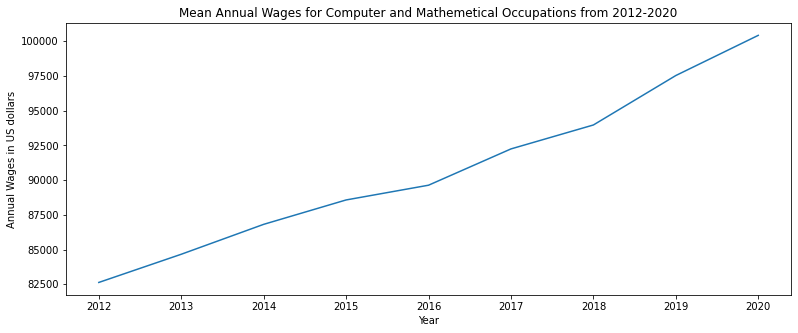

In [252]:
plt.figure(figsize=(13,5))
plt.plot(computer_mathematical.columns,computer_mathematical.loc['mean'])
plt.title('Mean Annual Wages for Computer and Mathemetical Occupations from 2012-2020')
plt.xlabel('Year')
plt.ylabel('Annual Wages in US dollars')
plt.show()